In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams

In [2]:
N = 50
dx = 2/(N-1)
nt = 25
dt = 0.02
c = 1
x = numpy.linspace(0,2,N)

In [7]:
u = numpy.ones(N)
lbound = numpy.where(x >= 0.5)
ubound = numpy.where(x <= 1)

print("lbound:", lbound)
print("Ubound:", ubound) 
print(x)

lbound: (array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49]),)
Ubound: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24]),)
[ 0.          0.04081633  0.08163265  0.12244898  0.16326531  0.20408163
  0.24489796  0.28571429  0.32653061  0.36734694  0.40816327  0.44897959
  0.48979592  0.53061224  0.57142857  0.6122449   0.65306122  0.69387755
  0.73469388  0.7755102   0.81632653  0.85714286  0.89795918  0.93877551
  0.97959184  1.02040816  1.06122449  1.10204082  1.14285714  1.18367347
  1.2244898   1.26530612  1.30612245  1.34693878  1.3877551   1.42857143
  1.46938776  1.51020408  1.55102041  1.59183673  1.63265306  1.67346939
  1.71428571  1.75510204  1.79591837  1.83673469  1.87755102  1.91836735
  1.95918367  2.        ]


In [8]:
bounds = numpy.intersect1d(lbound, ubound)
print (bounds)
u[bounds]=0.5
print(u)

[13 14 15 16 17 18 19 20 21 22 23 24]
[ 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.5  0.5
  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1. ]


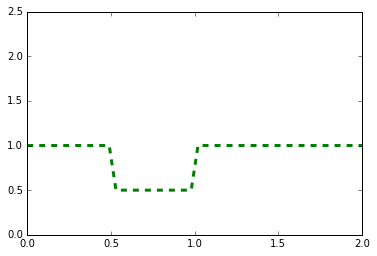

In [10]:
pyplot.plot(x, u, color='green', ls="--", lw=3)
pyplot.ylim(0,2.5);